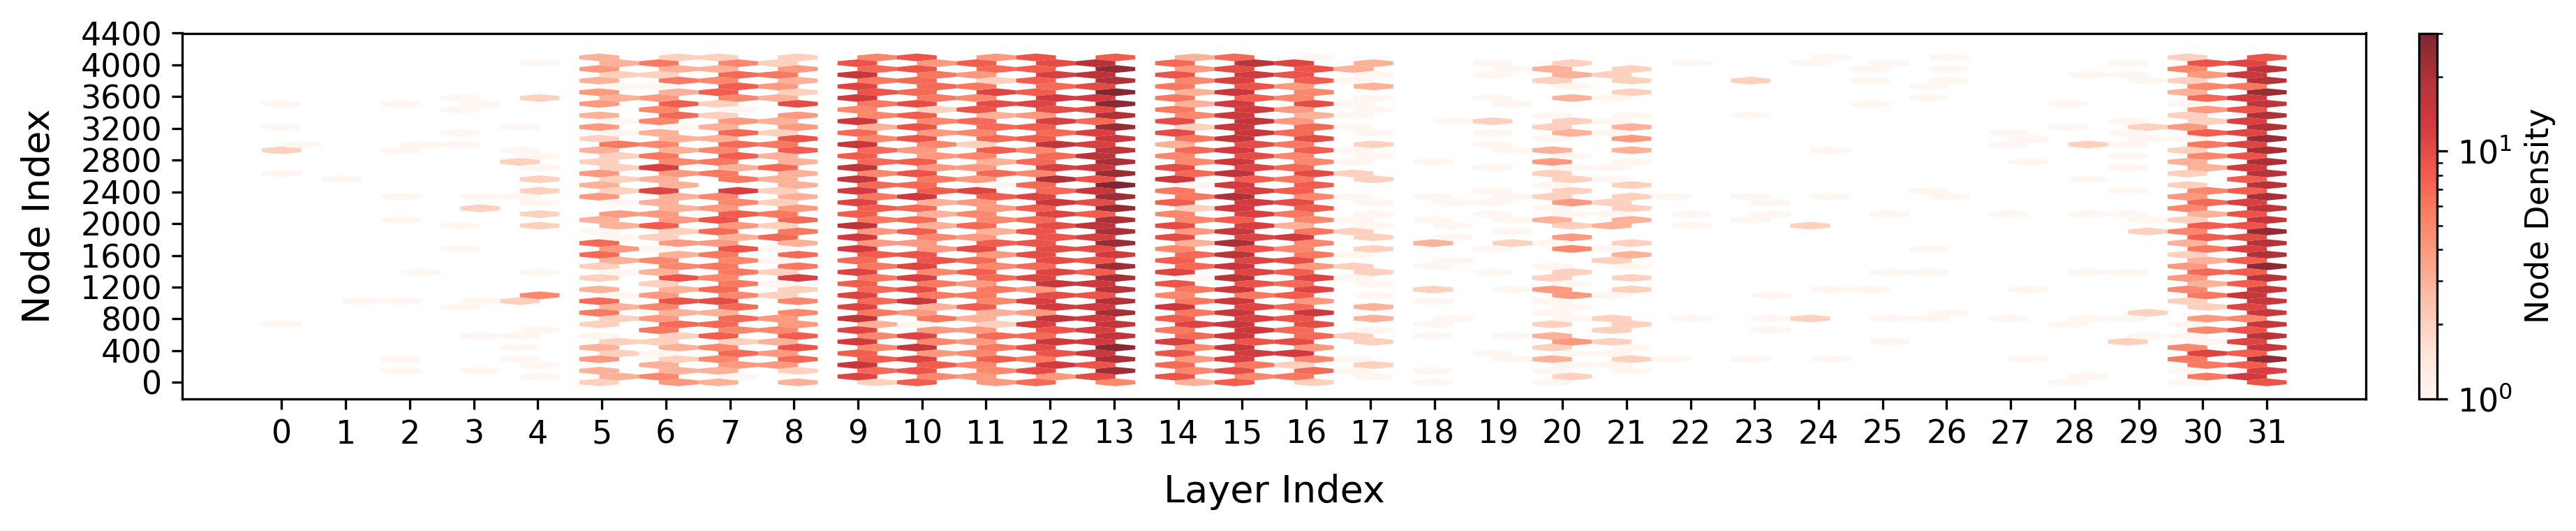

In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm

def display_target_neurons(target_list):
    # 科研论文绘图参数设置
    mpl.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 13,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'font.family': 'DejaVu Sans',
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'axes.spines.top': True,
        'axes.spines.right': True
    })

    # 转换坐标数据
    x = [point[0] for point in target_list]
    y = [point[1] for point in target_list]
    
    # 创建宽幅画布 (适合双栏论文的横版展示)
    fig, ax = plt.subplots(figsize=(14, 3))  # 宽度14英寸，高度6英寸
    
    # 绘制密度散点图
    hexbin = ax.hexbin(
        x, y, 
        gridsize=50,
        cmap='Reds', # Blues, Reds
        mincnt=1,
        edgecolors='none',
        alpha=0.85,
        norm=LogNorm(),
    )
    
    # 添加颜色条
    cb = fig.colorbar(hexbin, ax=ax, pad=0.02)
    cb.set_label('Node Density', fontsize=11)
    
    # 坐标轴设置
    ax.set_xlabel('Layer Index', fontsize=13, labelpad=8)
    ax.set_ylabel('Node Index', fontsize=13, labelpad=8)
    # ax.set_title('Distribution of Trainable Neurons', fontsize=15, pad=15)
    
    # 优化刻度显示
    max_layer = max(x)
    ax.set_xticks(range(0, max_layer+1, 1))
    ax.set_xticks(range(0, max_layer+1), minor=True)
    
    y_max = max(y)
    y_step = 400 if y_max > 1000 else 200
    ax.set_yticks(range(0, y_max+y_step, y_step))
    
    # # 添加辅助网格
    # ax.grid(
    #     which='major', 
    #     linestyle='--', 
    #     linewidth=0.5,
    #     alpha=0.4,
    #     color='#666666'
    # )
    
    # 优化布局
    plt.tight_layout(pad=2.0)
    
    # 保存为矢量图（论文推荐格式）
    plt.savefig('visual/figures/neuron_distribution.pdf', bbox_inches='tight')
    plt.show()

def convert_nested_list(nested_list):
    return [[i, neuron] for i, layer in enumerate(nested_list) for neuron in layer]

# 使用示例
json_path = "/workspace/ftg/target_neurons/Meta-Llama-3.1-8B-Instruct/GLOBAL_5_7steps_H.json"

with open(json_path, encoding="utf-8") as f:
    nested_data = json.load(f)
    target_list = convert_nested_list(nested_data)

display_target_neurons(target_list)

/tmp/ipykernel_504224/2334239150.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


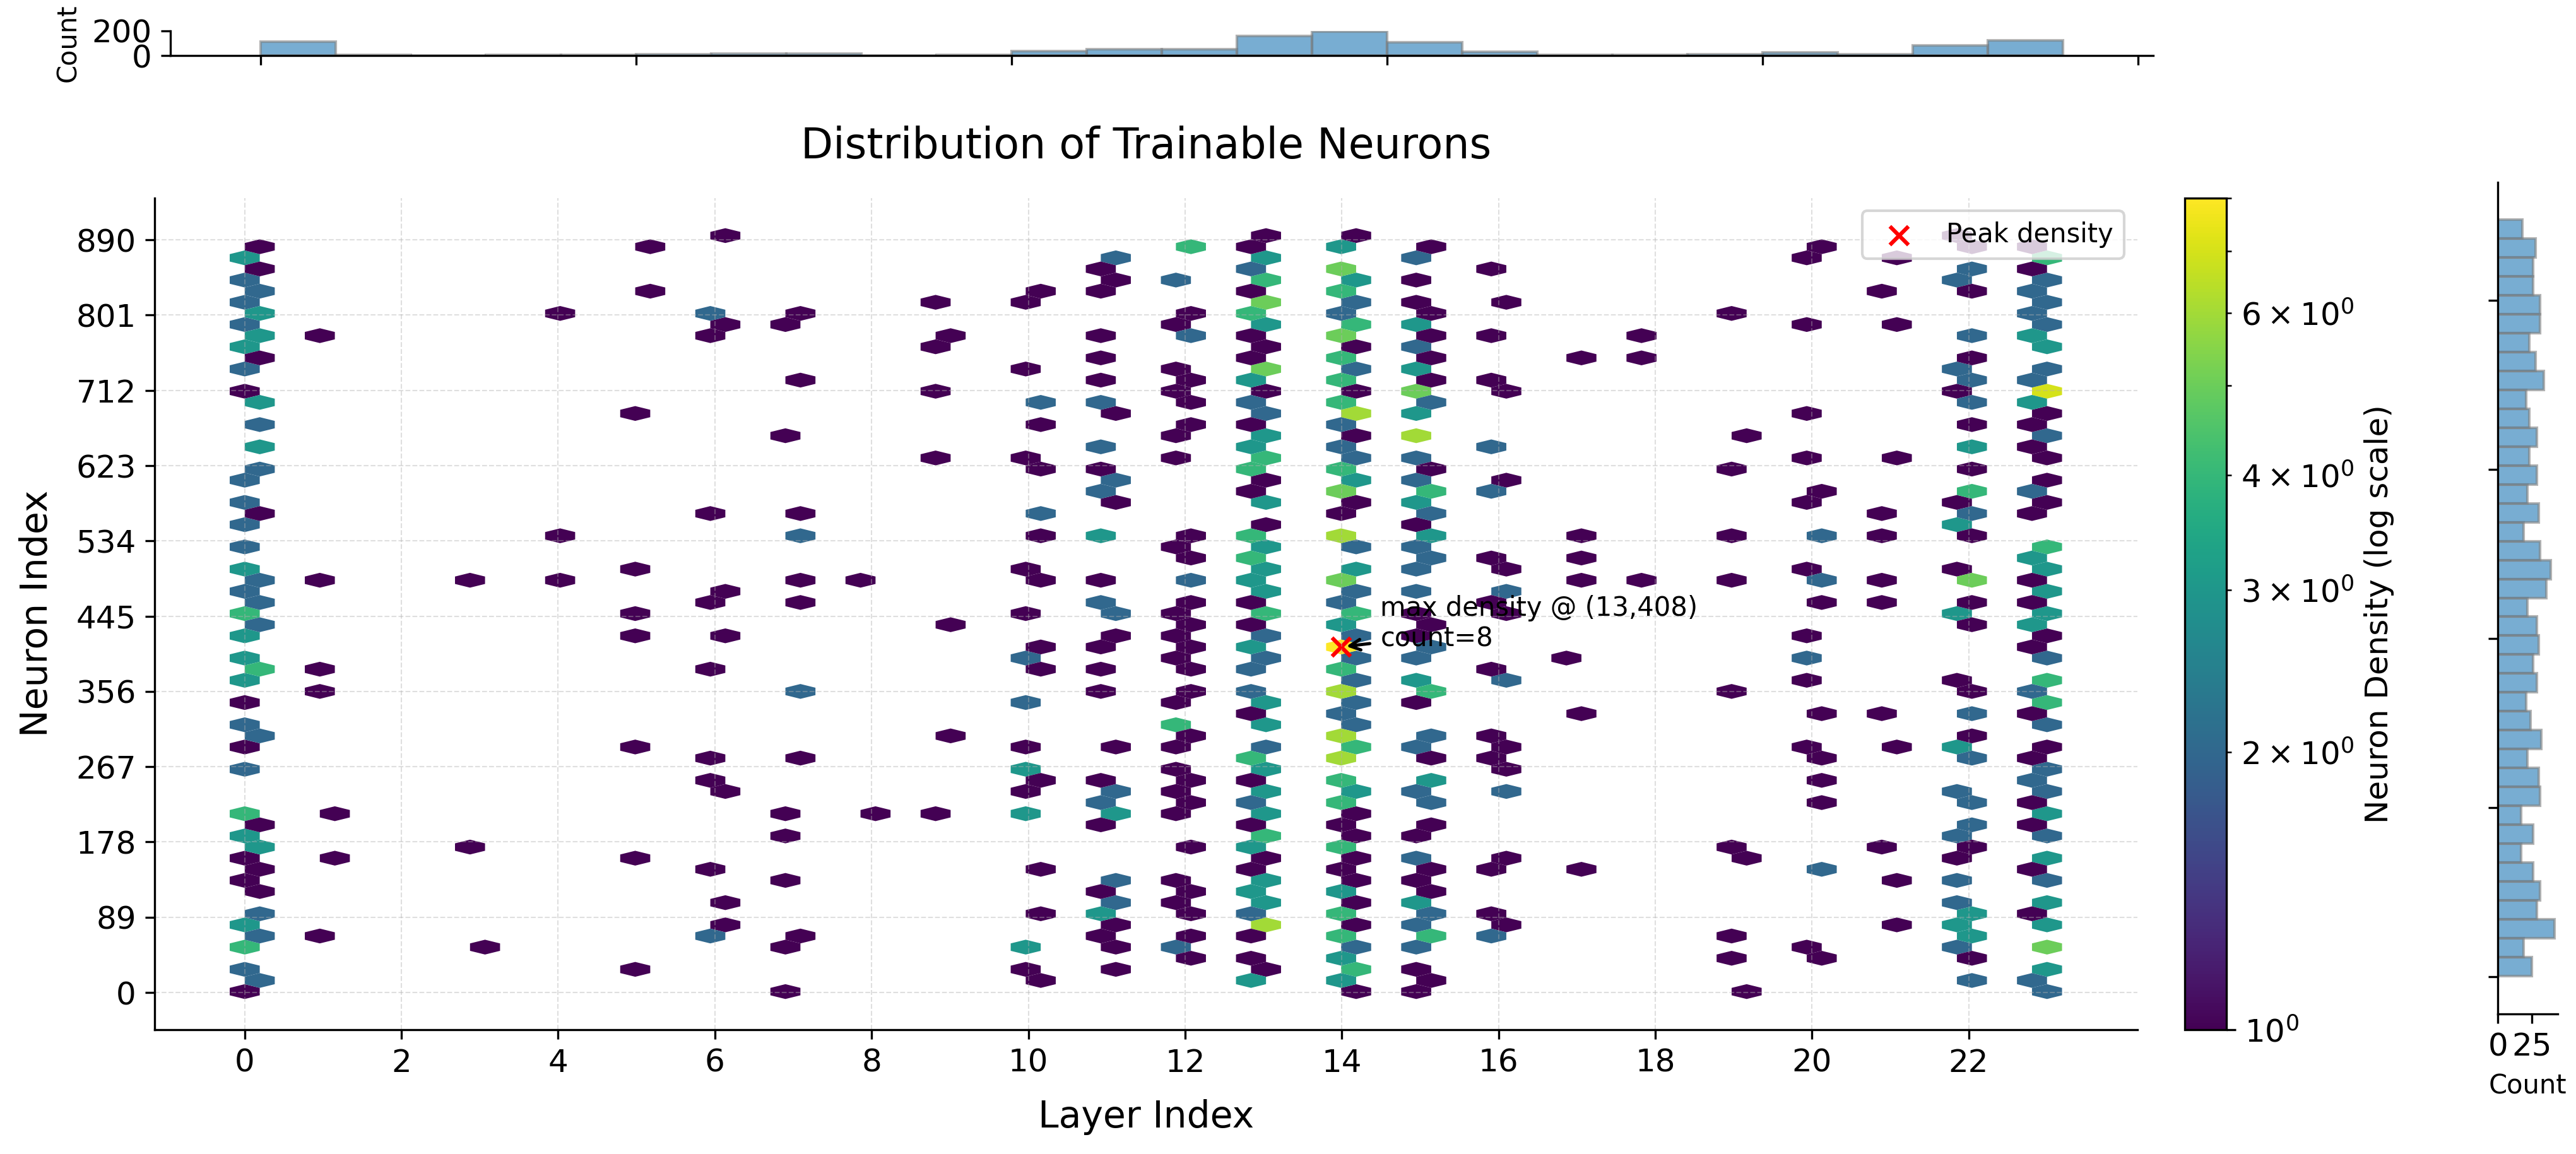

In [11]:
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def display_target_neurons_beautified(
    target_list,
    figsize=(14, 6),
    gridsize=60,
    cmap='viridis',
    log_scale=True,
    marginal_bins=40,
    font_family='DejaVu Sans',
    output_path='neuron_distribution_beautified.pdf'
):
    """
    绘制并美化神经元分布的 hexbin+边际直方图。
    
    参数：
      - target_list: [[layer_idx, neuron_idx], ...]
      - figsize: 画布尺寸
      - gridsize: hexbin 网格密度
      - cmap: 主图配色
      - log_scale: 是否对密度使用对数刻度
      - marginal_bins: 边际直方图的箱数
      - font_family: 字体
      - output_path: 输出文件名（PDF 矢量图）
    """
    # --------------------- 全局样式 ---------------------
    mpl.rcParams.update({
        'font.family': font_family,
        'font.size': 12,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'axes.spines.top': False,
        'axes.spines.right': False,
    })
    
    # 提取坐标
    x = [p[0] for p in target_list]
    y = [p[1] for p in target_list]
    
    # 主画布
    fig, ax = plt.subplots(figsize=figsize)
    
    # 选择是否使用对数刻度
    norm = LogNorm() if log_scale else None
    
    # 绘制 hexbin
    hb = ax.hexbin(
        x, y,
        gridsize=gridsize,
        cmap=cmap,
        mincnt=1,
        norm=norm,
        edgecolors='none'
    )
    
    # 颜色条
    cb = fig.colorbar(hb, ax=ax, pad=0.02)
    cb.set_label('Neuron Density' + (' (log scale)' if log_scale else ''), fontsize=12)
    
    # 标题和标签
    ax.set_title('Distribution of Trainable Neurons', pad=15)
    ax.set_xlabel('Layer Index', labelpad=8)
    ax.set_ylabel('Neuron Index', labelpad=8)
    
    # 边际直方图
    # 上方直方：layer 分布
    ax_histx = inset_axes(ax, width="100%", height="15%", loc='upper left',
                          bbox_to_anchor=(0, 1.02, 1, 0.2), bbox_transform=ax.transAxes)
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.hist(x, bins=range(min(x), max(x)+2), alpha=0.6, edgecolor='gray')
    ax_histx.set_ylabel('Count', fontsize=10)
    
    # 右侧直方：neuron 分布
    ax_histy = inset_axes(ax, width="15%", height="100%", loc='lower right',
                          bbox_to_anchor=(1.02, 0, 0.2, 1), bbox_transform=ax.transAxes)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.hist(y, bins=marginal_bins, orientation='horizontal', alpha=0.6, edgecolor='gray')
    ax_histy.set_xlabel('Count', fontsize=10)
    
    # 网格与刻度
    max_layer = max(x)
    ax.set_xticks(range(0, max_layer+1, max(1, max_layer//10)))
    y_max = max(y)
    y_step = max(1, y_max // 10)
    ax.set_yticks(range(0, y_max + y_step, y_step))
    ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.4)
    
    # 注释最密集的 bin
    # hexbin 返回的 offsets 和 counts
    counts = hb.get_array()
    offsets = hb.get_offsets()
    # 找到最大 count 的位置
    idx_max = counts.argmax()
    x_max, y_max = offsets[idx_max]
    ax.scatter([x_max], [y_max], color='red', s=50, marker='x', label='Peak density')
    ax.legend(loc='upper right', fontsize=10)
    ax.annotate(
        f'max density @ ({int(x_max)},{int(y_max)})\ncount={int(counts[idx_max])}',
        xy=(x_max, y_max), xytext=(x_max+0.5, y_max+0.5),
        arrowprops=dict(arrowstyle='->', lw=1.2), fontsize=10
    )
    
    plt.tight_layout(pad=2.0)
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()


def convert_nested_list(nested_list):
    """把 [[n1,n2,...],[...],...] 转成 [[layer_idx, neuron_idx], ...]"""
    return [[i, neuron] for i, layer in enumerate(nested_list) for neuron in layer]


# 使用示例
if __name__ == '__main__':
    json_path = "/workspace/ftg/target_neurons/Qwen2.5-0.5B-Instruct/20steps/GLOBAL_5.json"
    with open(json_path, 'r', encoding='utf-8') as f:
        nested_data = json.load(f)
    target_list = convert_nested_list(nested_data)
    display_target_neurons_beautified(target_list)
